In [2]:
import pandas as pd
pitches = pd.read_csv('pitches.csv')
ab = pd.read_csv('atbats.csv')


In [3]:
merged = pd.merge(pitches, ab[['ab_id', 'pitcher_id']], on='ab_id')

# Drop the unwanted column 'ab_id'
merged = merged.drop('ab_id', axis=1)

# Print the resulting merged dataframe
print(merged)

               px        pz  start_speed  end_speed  spin_rate  spin_dir  \
0        0.416000  2.963000         92.9       84.1   2305.052   159.235   
1       -0.191000  2.347000         92.8       84.1   2689.935   151.402   
2       -0.518000  3.284000         94.1       85.2   2647.972   145.125   
3       -0.641000  1.221000         91.0       84.0   1289.590   169.751   
4       -1.821000  2.083000         75.4       69.6   1374.569   280.671   
...           ...       ...          ...        ...        ...       ...   
2867149  0.230280  1.784910         83.9       78.2    608.594   275.800   
2867150 -1.211049  2.479020         97.7       89.5   2262.907   155.009   
2867151 -0.444578  2.619287         97.3       89.6   2514.010   147.166   
2867152 -0.259813  1.336484         95.9       88.6   2318.775   144.921   
2867153  0.279546  2.818937         95.8       87.7   2354.885   144.198   

         break_angle  break_length  break_y         ax  ...  event_num  \
0            

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

merged

KeyboardInterrupt: 

In [11]:
pitch_type_counts = merged['pitch_type'].value_counts()

# Display the count of each pitch type
print(pitch_type_counts)

FF    1014877
SL     450578
FT     337983
CH     292789
SI     242504
CU     234391
FC     149756
KC      66484
FS      43705
KN      11260
IN       6197
EP        815
FO        810
PO        628
SC        113
UN         57
FA          9
AB          9
Name: pitch_type, dtype: int64


In [4]:
# Create a boolean mask to filter out unwanted rows
mask = ~merged['pitch_type'].isin(['IN', 'EP', 'FO', 'PO', 'UN', 'FA', 'AB'])

# Filter the dataframe to keep only the desired rows
filtered_df = merged[mask]

# Display the filtered dataframe
filtered_df

cols_to_drop = ['type_confidence', 'nasty', 'zone', 'code', 'type', 'event_num', 'b_score', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b']

filtered_df = filtered_df.drop(cols_to_drop, axis=1)

filtered_df


px        pz  start_speed  end_speed  spin_rate  spin_dir  \
0        0.416000  2.963000         92.9       84.1   2305.052   159.235   
1       -0.191000  2.347000         92.8       84.1   2689.935   151.402   
2       -0.518000  3.284000         94.1       85.2   2647.972   145.125   
3       -0.641000  1.221000         91.0       84.0   1289.590   169.751   
4       -1.821000  2.083000         75.4       69.6   1374.569   280.671   
...           ...       ...          ...        ...        ...       ...   
2867149  0.230280  1.784910         83.9       78.2    608.594   275.800   
2867150 -1.211049  2.479020         97.7       89.5   2262.907   155.009   
2867151 -0.444578  2.619287         97.3       89.6   2514.010   147.166   
2867152 -0.259813  1.336484         95.9       88.6   2318.775   144.921   
2867153  0.279546  2.818937         95.8       87.7   2354.885   144.198   

         break_angle  break_length  break_y         ax  ...       vz0  \
0              -25.0           3.2     23.7   7.665000  ... -3.995000   
1              -40.7           3.4     23.7  12.043000  ... -5.980000   
2              -43.7           3.7     23.7  14.368000  ... -3.337000   
3               -1.3           5.0     23.8   2.104000  ... -6.567000   
4               18.4          12.0     23.8 -10.280000  ...  0.325000   
...              ...           ...      ...        ...  ...       ...   
2867149         10.5           8.8     23.9  -5.097492  ... -0.859601   
2867150        -26.9           2.9     23.8   9.344343  ... -5.100730   
2867151        -40.5           3.3     23.8  13.292081  ... -4.717196   
2867152        -34.2           3.8     23.8  12.786338  ... -7.246702   
2867153        -36.9           3.8     23.8  13.235496  ... -3.765228   

                  x        x0           y    y0        z0     pfx_x  \
0        101.140000  2.280000  158.780000  50.0  5.302000  4.160000   
1        124.280000  2.119000  175.410000  50.0  5.307000  6.570000   
2        136.740000  2.127000  150.110000  50.0  5.313000  7.610000   
3        109.685636  2.279000  187.463482  50.0  5.210000  1.170000   
4        146.527525  2.179000  177.242829  50.0  5.557000 -8.430000   
...             ...       ...         ...   ...       ...       ...   
2867149  108.220000  3.502933  190.580000  50.0  4.912177 -3.319733   
2867150  163.160000  2.792346  171.850000  50.0  5.061932  4.547344   
2867151  133.950000  3.026107  168.060000  50.0  5.040691  6.511325   
2867152  126.910000  3.041058  202.740000  50.0  4.881930  6.460353   
2867153  106.420000  3.082478  162.630000  50.0  5.099493  6.724996   

             pfx_z  pitch_type  pitcher_id  
0        10.930000          FF      452657  
1        12.000000          FF      452657  
2        10.880000          FF      452657  
3         6.450000          FF      452657  
4        -1.650000          CU      452657  
...            ...         ...         ...  
2867149  -0.337153          SL      623352  
2867150   9.755265          FF      623352  
2867151  10.090051          FF      623352  
2867152   9.199100          FF      623352  
2867153   9.323322          FF      623352  

[2858629 rows x 26 columns]

In [5]:
grouped_df = filtered_df.groupby(['pitch_type', 'pitcher_id']).mean()
#pd.set_option('display.max_rows', None)
#grouped_df


/Users/gabe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


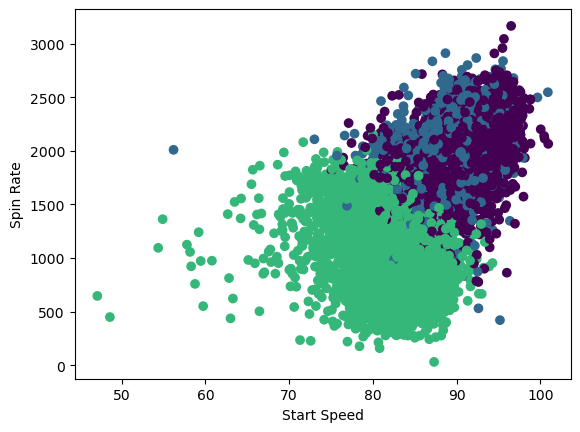

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the features to use for clustering
features = ['start_speed', 'spin_rate', 'pfx_x', 'pfx_z', 'break_y', 'break_angle', 'break_length','break_y', 'ax','ay','az', 'sz_bot','sz_top','vx0','vy0','vz0','x','x0','y', 'z0','pfx_x']

# Create a new dataframe with only the selected features
cluster_df = grouped_df[features]

# Normalize the data
normalized_df = (cluster_df - cluster_df.mean()) / cluster_df.std()

# Run k-means clustering algorithm with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(normalized_df)

# Add the cluster labels to the original dataframe
grouped_df['cluster'] = kmeans.labels_

# Visualize the results
plt.scatter(grouped_df['start_speed'], grouped_df['spin_rate'], c=grouped_df['cluster'])
plt.xlabel('Start Speed')
plt.ylabel('Spin Rate')
plt.show()


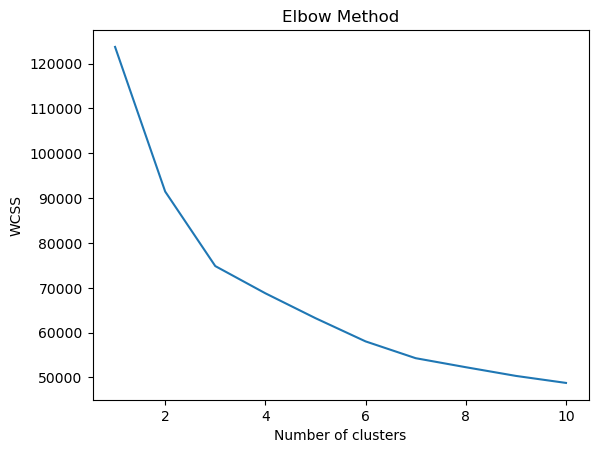

/Users/gabe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


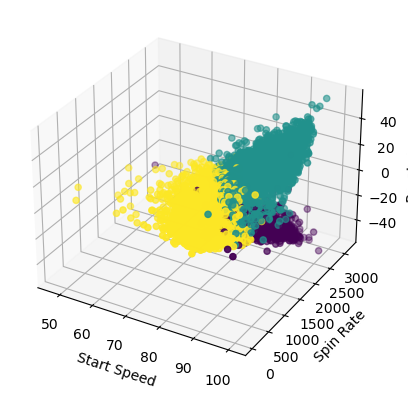

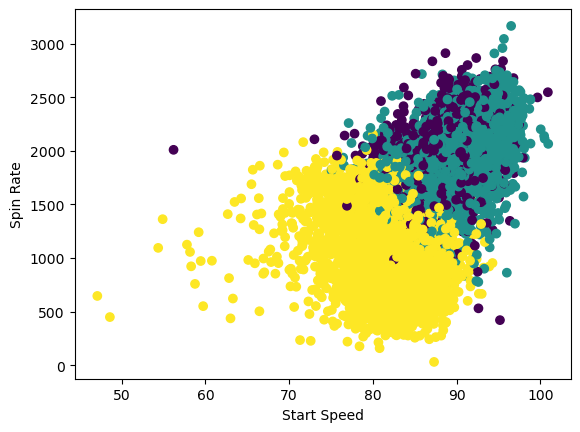

In [26]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select the features to use for clustering
features = ['start_speed', 'spin_rate', 'pfx_x', 'pfx_z', 'break_y', 'break_angle', 'break_length','break_y', 'ax','ay','az', 'sz_bot','sz_top','vx0','vy0','vz0','x','x0','y', 'z0','pfx_x']

# Create a new dataframe with only the selected features
cluster_df = grouped_df[features]

# Normalize the data
normalized_df = (cluster_df - cluster_df.mean()) / cluster_df.std()

# Run k-means clustering algorithm for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Run k-means clustering algorithm with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_df)

# Add the cluster labels to the original dataframe
grouped_df['cluster'] = kmeans.labels_

# Visualize the results with a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grouped_df['start_speed'], grouped_df['spin_rate'], grouped_df['break_angle'], c=grouped_df['cluster'])
ax.set_xlabel('Start Speed')
ax.set_ylabel('Spin Rate')
ax.set_zlabel('Break Angle')
plt.show()

plt.scatter(grouped_df['start_speed'], grouped_df[''], c=grouped_df['cluster'])
plt.xlabel('Start Speed')
plt.ylabel('Spin Rate')
plt.show()



In [6]:
pitch_type_groups = dict(tuple(grouped_df.groupby('pitch_type')))

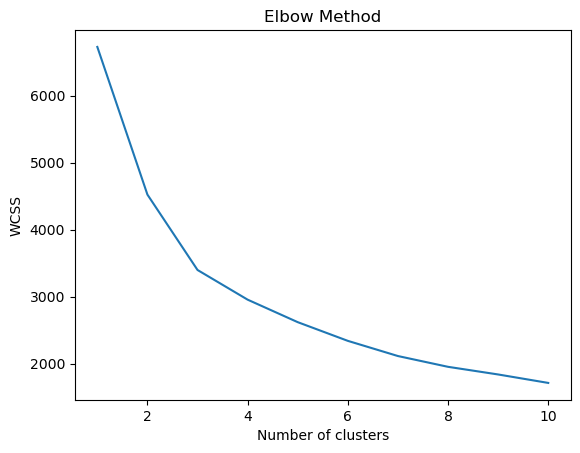

/Users/gabe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: operands could not be broadcast together with shapes (1122,) (4,) 

In [66]:
changeup_df = pitch_type_groups['CH']
features = ['start_speed', 'spin_rate', 'pfx_x', 'pfx_z', 'break_angle', 'break_length']

# Create a new dataframe with only the selected features
cluster_df = changeup_df[features]

# Normalize the data
normalized_df = (cluster_df - cluster_df.mean()) / cluster_df.std()

# Run k-means clustering algorithm for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Run k-means clustering algorithm with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(normalized_df)

# Calculate feature importance
feature_wcss = []
for i in range(len(features)):
    feature_wcss.append(sum((normalized_df.iloc[:, i].values - kmeans.cluster_centers_[:, i]) ** 2))

# Sort the WCSS in descending order to obtain the most important features
sorted_indices = sorted(range(len(feature_wcss)), key=lambda k: feature_wcss[k], reverse=True)

# Visualize the feature importance
plt.bar([features[i] for i in sorted_indices], [feature_wcss[i] for i in sorted_indices])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')
plt.show()


# Add the cluster labels to the original dataframe
changeup_df['cluster'] = kmeans.labels_

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(changeup_df['start_speed'], changeup_df['spin_rate'], changeup_df['pfx_z'], c=changeup_df['cluster'])
ax.set_xlabel('Start Speed')
ax.set_ylabel('Spin Rate')
ax.set_zlabel('Break Angle')
plt.show()

plt.scatter(changeup_df['start_speed'], changeup_df['pfx_z'], c=changeup_df['cluster'])
plt.xlabel('Start Speed')
plt.ylabel('Spin Rate')
plt.show()




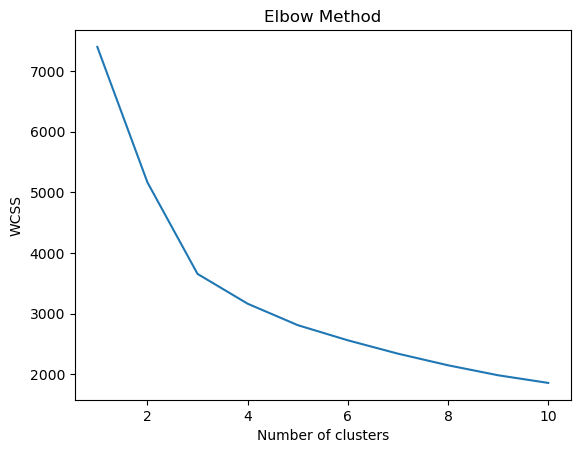

/Users/gabe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


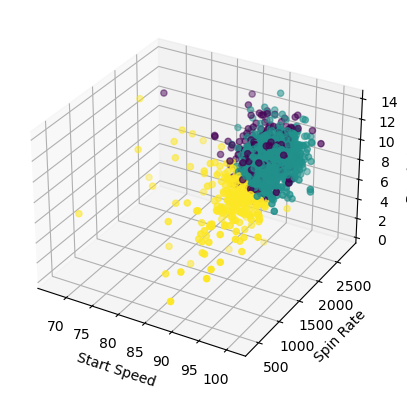

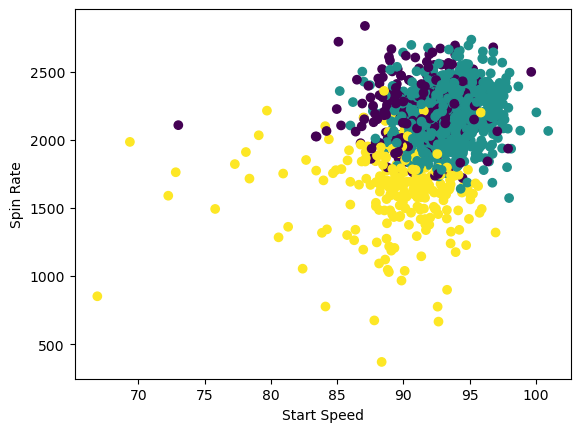

In [67]:
ff_df = pitch_type_groups['FF']
features = ['start_speed', 'spin_rate', 'pfx_x', 'pfx_z', 'break_angle', 'break_length']
# Create a new dataframe with only the selected features
cluster_df = ff_df[features]

# Normalize the data
normalized_df = (cluster_df - cluster_df.mean()) / cluster_df.std()

# Run k-means clustering algorithm for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Run k-means clustering algorithm with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_df)

# Add the cluster labels to the original dataframe
ff_df['cluster'] = kmeans.labels_

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ff_df['start_speed'], ff_df['spin_rate'], ff_df['pfx_z'], c=ff_df['cluster'])
ax.set_xlabel('Start Speed')
ax.set_ylabel('Spin Rate')
ax.set_zlabel('Break Angle')
plt.show()


plt.scatter(ff_df['start_speed'], ff_df['spin_rate'], c=ff_df['cluster'])
plt.xlabel('Start Speed')
plt.ylabel('Spin Rate')
plt.show()


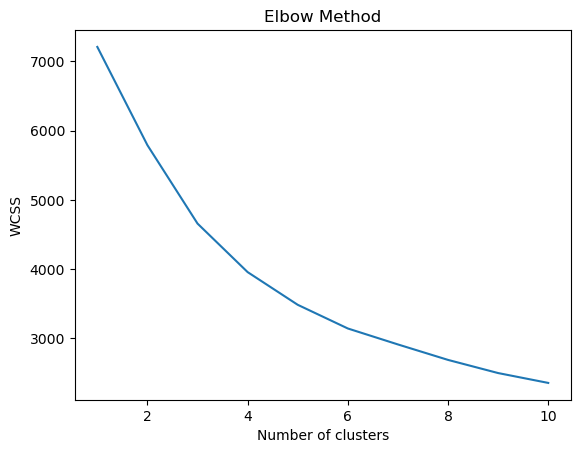

/Users/gabe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


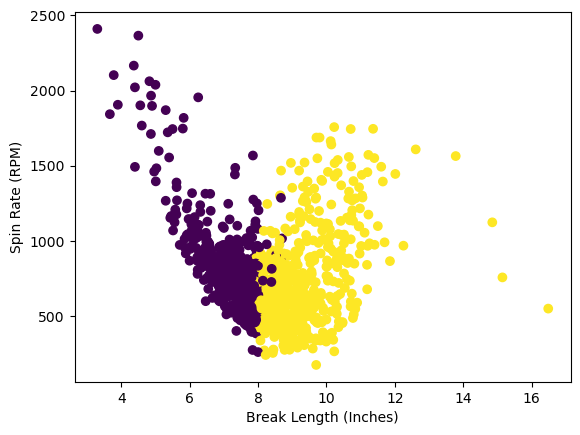

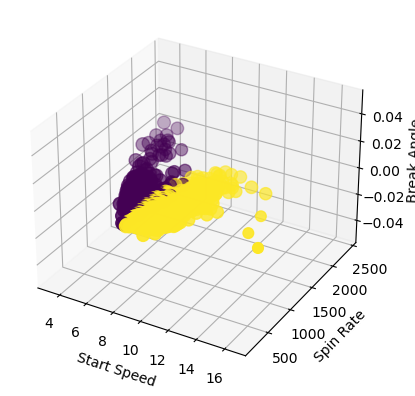

In [82]:
sl_df = pitch_type_groups['SL']
features = ['start_speed', 'spin_rate', 'pfx_x', 'pfx_z', 'break_y', 'break_angle', 'break_length']

# Create a new dataframe with only the selected features
# Create a new dataframe with only the selected features
cluster_df = sl_df[features]

# Normalize the data
normalized_df = (cluster_df - cluster_df.mean()) / cluster_df.std()

# Run k-means clustering algorithm for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Run k-means clustering algorithm with 4 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(normalized_df)

# Add the cluster labels to the original dataframe
sl_df['cluster'] = kmeans.labels_

plt.scatter(sl_df['break_length'], sl_df['spin_rate'], c=sl_df['cluster'])
plt.xlabel('Break Length (Inches)')
plt.ylabel('Spin Rate (RPM)')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(sl_df['break_length'], sl_df['spin_rate'], sl_df['start_speed'], c=sl_df['cluster'])
ax.set_xlabel('Start Speed')
ax.set_ylabel('Spin Rate')
ax.set_zlabel('Break Angle')
plt.show()


In [83]:
ch_df = pitch_type_groups['CH']
ff_df = pitch_type_groups['FF']
sl_df = pitch_type_groups['SL']
cu_df = pitch_type_groups['CU']
si_df = pitch_type_groups['SI']
ft_df = pitch_type_groups['FT']

ch_df.to_csv('ch.csv', index=False)
ff_df.to_csv('ff.csv', index=False)
sl_df.to_csv('sl.csv', index=False)
cu_df.to_csv('cu.csv', index=False)
si_df.to_csv('si.csv', index=False)
ft_df.to_csv('ft.csv', index=False)

px         pz  start_speed  end_speed  \
pitch_type pitcher_id                                                
CH         112526     -0.442356   1.766197    81.010747  74.434731   
           115629     -0.737636   2.670523    84.115909  77.895455   
           136600      1.211062   1.890375    75.606250  70.637500   
           150116      0.668420   2.157957    78.005797  72.839130   
           150274     -0.534333   2.709667    84.600000  79.200000   
           150302     -0.344927   1.979957    78.242073  72.489024   
           150359     -0.260457   2.022822    85.699543  79.732420   
           217096      0.637909   2.006273    73.790909  68.406061   
           234194     -0.418500   1.535000    84.275000  77.950000   
           276351     -0.722944   1.938192    84.940426  77.936170   
           276520     -0.349268   2.155229    75.728829  69.690090   
           276542     -0.486349   1.554124    84.146740  77.660886   
           279571     -0.365439   1.497073    86.006667  79.613333   
           279824      0.448587   2.044405    78.163406  72.047555   
           282332      0.632012   2.077694    83.266408  76.962791   
           285064     -0.147694   1.861697    83.495745  77.060372   
           346793      0.257750   1.655333    86.062500  79.652083   
           346797     -0.510000   1.377500    87.500000  80.100000   
           346798     -0.118824   1.887574    79.098381  73.195504   
           346847      0.485118   1.672706    80.698529  74.026471   
           400085      0.194667   2.699222    86.633333  78.655556   
           407793     -0.465871   1.661201    83.892643  77.454768   
           407845     -0.254717   1.885351    82.889932  76.309265   
           407890     -0.708587   2.117821    82.719062  76.818182   
           408061     -0.013712   1.668233    83.166329  77.202140   
           408241     -0.630371   1.630923    82.645560  76.714286   
           421685     -0.546474   2.127211    83.487889  77.117993   
           424144     -0.732000   1.859500    83.750000  77.750000   
           425386     -0.202628   1.828254    85.059367  78.681265   
           425492     -0.349388   1.685415    83.930012  77.507948   
           425532     -0.483599   1.691249    83.403807  76.832234   
           425543     -0.676667   2.353333    84.877778  77.955556   
           425560      0.425600   2.203200    82.600000  75.900000   
           425626      0.205858   1.581208    77.750000  71.963869   
           425657      0.444744   1.927907    79.030233  72.897674   
           425772     -0.316937   3.734648    82.175000  74.525000   
           425794     -0.657416   2.197479    81.822120  75.432258   
           425796     -0.972857   2.696190    85.638095  79.533333   
           425835     -0.612556   2.089778    85.244444  78.477778   
           425840      0.435667   3.826000    86.733333  79.300000   
           425844     -0.565895   1.611740    87.271409  81.112591   
           425856     -0.645684   2.133947    86.373684  79.852632   
           429400      0.179513   1.734256    84.774359  78.279487   
           429719     -0.524749   1.823440    87.209756  80.086585   
           429722     -0.397790   1.893301    85.055941  78.641213   
           429780      0.457141   1.872021    83.022535  76.338732   
           429781     -0.801507   1.923560    83.569333  77.382667   
           429783     -0.714037   1.608951    84.192683  78.189024   
           430589     -0.647000   1.962200    82.513333  76.446667   
           430599     -0.630367   1.642051    85.537868  79.298866   
           430605     -0.243929   3.262357    83.842857  77.778571   
           430613     -0.927429   2.344143    89.235714  81.728571   
           430630     -0.302080   1.777190    86.387000  79.957000   
           430634      0.191700   1.288600    82.270000  76.100000   
           430641     -0.706485   2.180667    86.985714  80.492857   
           430661     -0.520574   1.824

In [8]:
sl_df = pitch_type_groups['SL']
sl_df

px        pz  start_speed  end_speed   spin_rate  \
pitch_type pitcher_id                                                           
SL         112526      0.734718  1.931652    81.559302  75.554522  632.825168   
           115629      0.508157  2.398787    87.135955  80.949438  911.379067   
           136600     -0.455054  2.051784    81.078378  76.127027  790.862297   
           150116     -0.835119  2.309649    83.096026  77.735099  684.691252   
           150274      1.080333  1.913061    85.603030  79.839394  509.269909   
...                         ...       ...          ...        ...         ...   
           669456      0.398435  1.913200    83.674020  77.741422  282.156811   
           670036      0.423254  1.879995    86.902532  80.402532  679.565177   
           670950      0.302472  1.723649    80.505172  74.355172  390.109259   
           672335     -0.639205  2.037326    84.277273  77.224242  634.349333   
           673633     -0.184261  2.241131    82.500000  75.890000  686.510600   

                         spin_dir  break_angle  break_length    break_y  \
pitch_type pitcher_id                                                     
SL         112526      140.560903    -4.290310      8.361499  23.849612   
           115629      167.544236    -5.187640      6.398876  23.841573   
           136600      176.443541    -0.162162      7.513514  23.910811   
           150116      212.651656     7.023841      7.599338  23.888079   
           150274      136.857636    -7.218182      7.715152  23.869697   
...                           ...          ...           ...        ...   
           669456      104.925483    -3.033824      8.818873  23.888235   
           670036      115.806152   -10.927848      7.606329  23.870886   
           670950      135.297303    -2.050000     10.162069  23.856207   
           672335      285.170530     4.736364      9.796970  23.822727   
           673633      207.579500     1.540000      7.710000  23.810000   

                             ax  ...       vx0         vy0       vz0  \
pitch_type pitcher_id            ...                                   
SL         112526      1.637833  ...  4.314139 -119.030805 -2.498506   
           115629      1.478090  ...  4.935742 -127.566831 -4.757787   
           136600      0.929892  ... -6.545514 -118.662811 -3.319703   
           150116     -2.503815  ... -6.425689 -121.635536 -3.139265   
           150274      2.682939  ...  7.023242 -125.260455 -4.553909   
...                         ...  ...       ...         ...       ...   
           669456      1.238908  ...  3.263290 -121.823261 -2.263727   
           670036      4.881990  ...  5.532960 -126.464360 -2.214530   
           670950      0.574314  ...  4.163277 -117.113302 -2.294100   
           672335     -2.532773  ... -2.745516 -122.524521 -1.130355   
           673633     -1.629339  ...  4.833491 -119.983386 -3.106224   

                                x        x0           y    y0        z0  \
pitch_type pitcher_id                                                     
SL         112526       88.656499 -1.239696  186.224368  50.0  5.607764   
           115629       97.627640 -1.560382  174.014045  50.0  6.236551   
           136600      134.345676  2.238811  183.381892  50.0  5.828703   
           150116      148.198558  2.043093  176.319425  50.0  5.983815   
           150274       78.150136 -1.970333  185.382447  50.0  6.137303   
...                           ...       ...         ...   ...       ...   
           669456      101.705709 -1.054375  187.241843  50.0  5.643369   
           670036      100.866582 -2.172391  188.018228  50.0  5.128704   
           670950      105.476448 -1.545288  188.346172  50.0  5.927391   
           672335      141.365000  0.715312  175.776364  50.0  5.604646   
           673633      124.022000 -2.084444  178.279000  50.0  5.967398   

                          pfx_x     pfx_z  
pitch_type pitcher_id                     

In [9]:
ff_df = pitch_type_groups['FF']
ff_df


px        pz  start_speed  end_speed  \
pitch_type pitcher_id                                               
FF         112526     -0.142424  2.664059    89.949829  82.373547   
           115629     -0.117076  2.550000    93.042157  85.783578   
           136600     -0.345000  2.477000    85.100000  78.000000   
           150116     -0.404969  2.818175    88.663918  82.137113   
           150274      0.013237  3.057373    91.227119  84.206780   
...                         ...       ...          ...        ...   
           669456     -0.036133  2.521206    93.008679  85.182353   
           670036      0.302081  2.602744    92.752239  85.256716   
           670950      0.105484  2.383868    90.746034  82.615372   
           672335     -0.085559  2.711257    95.332374  86.307194   
           673633      0.113961  2.631994    91.361186  83.342712   

                         spin_rate    spin_dir  break_angle  break_length  \
pitch_type pitcher_id                                                       
FF         112526      1984.776894  205.702826    22.172051      4.396453   
           115629      2164.644990  223.530936    33.209559      4.963480   
           136600      2718.559000  150.260000   -37.200000      4.300000   
           150116      2053.130680  154.748722   -20.986598      4.217526   
           150274      2073.064627  201.205847    19.071186      3.779661   
...                            ...         ...          ...           ...   
           669456      2248.466761  216.163689    34.481967      4.366827   
           670036      1607.673119  205.048910    14.276119      4.346269   
           670950      2219.919967  207.598396    27.193949      4.123876   
           672335      2148.041281  167.583266   -15.260432      3.017986   
           673633      2259.770537  209.579807    29.033729      4.062881   

                         break_y         ax  ...       vx0         vy0  \
pitch_type pitcher_id                        ...                         
FF         112526      23.780043  -7.725905  ...  3.370536 -131.339609   
           115629      23.797794 -13.768529  ...  5.890735 -136.154885   
           136600      23.800000  11.568000  ... -7.785000 -124.442000   
           150116      23.826804   7.776196  ... -7.751268 -129.693103   
           150274      23.803390  -6.798271  ...  5.946576 -133.499695   
...                          ...        ...  ...       ...         ...   
           669456      23.809450 -12.316425  ...  4.748494 -135.356220   
           670036      23.831343  -6.311845  ...  7.754874 -134.909248   
           670950      23.783074  -9.314378  ...  5.592645 -131.910003   
           672335      23.765468   4.392008  ... -2.715660 -138.555700   
           673633      23.801356 -10.188556  ...  7.355486 -132.720844   

                            vz0           x        x0           y    y0  \
pitch_type pitcher_id                                                     
FF         112526     -4.720375  122.020107 -0.871477  166.404231  50.0   
           115629     -6.412262  121.127393 -1.353875  169.625005  50.0   
           136600     -5.903000  130.150000  1.868000  171.900000  50.0   
           150116     -4.685402  130.394124  2.025041  161.331649  50.0   
           150274     -6.001797  116.498136 -1.752864  156.228983  50.0   
...                         ...         ...       ...         ...   ...   
           669456     -5.307928  118.172131 -0.950792  170.371758  50.0   
           670036     -2.886392  104.061940 -2.156003  165.760149  50.0   
           670950     -6.336045  112.902562 -1.355590  174.336453  50.0   
           672335     -5.641519  120.257554  0.617651  165.591439  50.0   
           673633     -5.725007  112.662237 -1.949732  167.707102  50.0   

                             z0     pfx_x      pfx_z  
pitch_type pitcher_id                                 
FF         112526      5.696731 -4.433236   9.128706  
           115629      6.

In [11]:
sl_df.to_csv('new_sl.csv', index=False)

In [12]:
fc_df = pitch_type_groups['FC']
fs_df = pitch_type_groups['FS']
kc_df = pitch_type_groups['KC']
sc_df = pitch_type_groups['SC']
kn_df = pitch_type_groups['KN']

fc_df.to_csv('fc.csv', index=False)
fs_df.to_csv('fs.csv', index=False)
kc_df.to_csv('kc.csv', index=False)
sc_df.to_csv('sc.csv', index=False)
kn_df.to_csv('kn.csv', index=False)
